<a href="https://colab.research.google.com/github/Trangng320/Tri-Tue-Nhan-Tao/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_lo%E1%BA%A1i_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Hoa


/content/drive/MyDrive/Hoa


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Hoa/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 183 images belonging to 3 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Hoa/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 55 images belonging to 3 classes.


In [6]:
training_set.class_indices

{'Rose': 0, 'Sun': 1, 'Tulip': 2}

In [7]:
validation.class_indices

{'Rose': 0, 'Sun': 1, 'Tulip': 2}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
6/6 [==============================] - 59s 10s/step - loss: 6.2949 - accuracy: 0.4317 - val_loss: 1.0990 - val_accuracy: 0.4182
Epoch 2/100
6/6 [==============================] - 2s 410ms/step - loss: 0.8410 - accuracy: 0.6940 - val_loss: 0.4594 - val_accuracy: 0.8545
Epoch 3/100
6/6 [==============================] - 2s 400ms/step - loss: 0.4349 - accuracy: 0.8197 - val_loss: 0.3573 - val_accuracy: 0.8364
Epoch 4/100
6/6 [==============================] - 2s 403ms/step - loss: 0.3159 - accuracy: 0.8689 - val_loss: 0.2600 - val_accuracy: 0.8909
Epoch 5/100
6/6 [==============================] - 2s 419ms/step - loss: 0.3009 - accuracy: 0.8962 - val_loss: 0.3514 - val_accuracy: 0.8727
Epoch 6/100
6/6 [==============================] - 2s 387ms/step - loss: 0.2877 - accuracy: 0.8743 - val_loss: 0.1816 - val_accuracy: 0.9636
Epoch 7/100
6/6 [==============================] - 2s 391ms/step - loss: 0.2007 - accuracy: 0.9180 - val_loss: 0.1375 - val_accuracy: 0.9273
Epoch 8/100
6/

In [10]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01628781110048294
Train Accuracy 0.994535505771637


In [12]:
# Lưu lại
model.save("Hoa.h5")

In [21]:
# Tải mô hình 
model_CNN=load_model('Hoa.h5')

1/1 [==============================] - 0s 16ms/step
Đây là : Rose


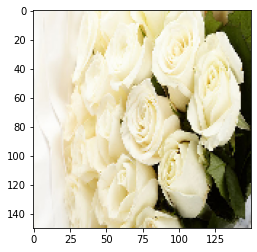

In [25]:
img = load_img('/content/hoahong (2).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_hoa=['Rose', 'Sun', 'Tulip']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_hoa[a])

1/1 [==============================] - 0s 106ms/step
Đây là : Sun


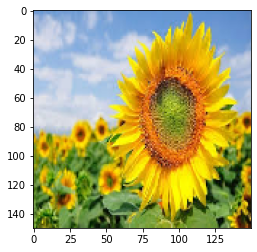

In [26]:
img = load_img('/content/huongduong (4).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_hoa=['Rose', 'Sun', 'Tulip']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_hoa[a])

1/1 [==============================] - 0s 17ms/step
Đây là : Tulip


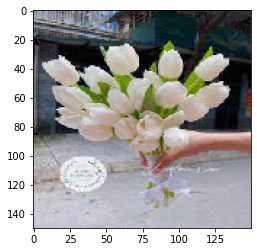

In [27]:
img = load_img('/content/tulip (6).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_hoa=['Rose', 'Sun', 'Tulip']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_hoa[a])

In [34]:
!jupyter nbconvert --to html "/content/1.ipynb"

[NbConvertApp] Converting notebook /content/1.ipynb to html
[NbConvertApp] Writing 683454 bytes to /content/1.html
